# Stack Exchange

Stack Exchange hosts sites on a multifude of fields and subjects, including mathematics, physics, philosophy, and data science. 

Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

In this project, we are going to expore about Data Science Stack Exchange and find a way to increase its popularity. 

[This link](https://data.stackexchange.com/datascience/query/new) allows you to explore the data collected within DSSE using T-SQL. We are going to gather post that are created in 2019. 

```SQL
SELECT *
  FROM posts
  WHERE year(CreationDate) = 2018
```

The result is stored in '2019_questions.csv' file.

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('2019_questions.csv')

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


## Exploring Data

- Id: An identification number for the post.
- PostTypeId: An identification number for the type of post.
- CreationDate: The date and time of creation of the post.
- Score: The post's score.
- ViewCount: How many times the post was viewed.
- Tags: What tags were used.
- AnswerCount: How many answers the question got (only applicable to question posts).
- FavoriteCount: How many times the question was favored (only applicable to question posts).

In [5]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


From the result above, we can see that there are missing values in the FavoriteCount field.

In [20]:
df.shape[0]

8839

In [27]:
for column in df.columns:
    if df[column].isnull().value_counts()[0] != df.shape[0]:
        print('{}:{}'.format(column, df[column].isnull().value_counts()))
        print('{}(Normalized):{}'.format(column, df[column].isnull().value_counts(normalize = True)))
    

FavoriteCount:True     7432
False    1407
Name: FavoriteCount, dtype: int64
FavoriteCount(Normalized):True     0.840819
False    0.159181
Name: FavoriteCount, dtype: float64


In [33]:
df.dtypes

Id                 int64
CreationDate      object
Score              int64
ViewCount          int64
Tags              object
AnswerCount        int64
FavoriteCount    float64
dtype: object

We can see that about 7,432(84.08%) records are missing FavoriteCount values. The columns is only applicable to Questions types of posts. If it doesn't have values, it's probably reasonable to think it's not a question post. Let's see what the unique values are. It looks safe to fill the missing values with 0s. 

Other values data types looks adequate except CreationDate and FavoriteCount. We can change the type of CreationDate to datetime and FavoriteCount to int64 since it's count we don't need decimal points . The other issue is that Tags fields has that data looks like this.   

<machine-learning><data-mining>  

That could be problemetic if we want to track the tags of posts. We are going to change it to something like this.  

machine-learning,data-mining

Then, we can split on , to obtain a list.

In [35]:
df['FavoriteCount'].fillna(0, inplace = True)

In [41]:
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
df['FavoriteCount'] = df['FavoriteCount'].astype(int)

In [42]:
df.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

In [45]:
df["Tags"] = df["Tags"].str.replace("><",',').str.replace("<","").str.replace(">","")


In [51]:
df['Tags'] = df['Tags'].str.split(',')

## Most Used and Most Viewed


In [132]:
tag_used = {}
tag_viewed = {}

In [133]:
def count_tag(_list):
    for tag in _list:
        if tag in tag_used:
            tag_used[tag] += 1
        else:
            tag_used[tag] = 1

def count_view(df):
    for tag in list(df['Tags']):
        if tag in tag_viewed:
            tag_viewed[tag] += df['ViewCount']
        else:
            tag_viewed[tag] = df['ViewCount']

In [134]:
df['Tags'].apply(count_tag)
df.apply(count_view, axis = 1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
8809    None
8810    None
8811    None
8812    None
8813    None
8814    None
8815    None
8816    None
8817    None
8818    None
8819    None
8820    None
8821    None
8822    None
8823    None
8824    None
8825    None
8826    None
8827    None
8828    None
8829    None
8830    None
8831    None
8832    None
8833    None
8834    None
8835    None
8836    None
8837    None
8838    None
Length: 8839, dtype: object

In [138]:
tag_used = pd.Series(tag_used)
tag_viewed = pd.Series(tag_viewed)

In [140]:
tag_used.sort_values(ascending=False, inplace = True)
tag_viewed.sort_values(ascending=False, inplace = True)

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [152]:
tag_used

machine-learning             2696
python                       1814
deep-learning                1220
neural-network               1055
keras                         935
classification                685
tensorflow                    584
scikit-learn                  540
nlp                           493
cnn                           489
time-series                   466
lstm                          402
pandas                        354
regression                    350
dataset                       340
r                             268
predictive-modeling           265
clustering                    257
statistics                    234
machine-learning-model        224
data-mining                   217
data                          213
image-classification          211
feature-selection             209
reinforcement-learning        203
data-science-model            186
linear-regression             178
pytorch                       175
xgboost                       165
feature-engine

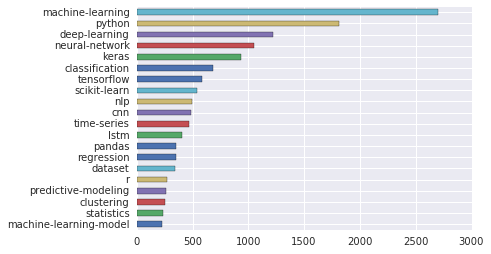

In [170]:
tag_used.head(20).sort_values(ascending=True).plot(kind = 'barh')

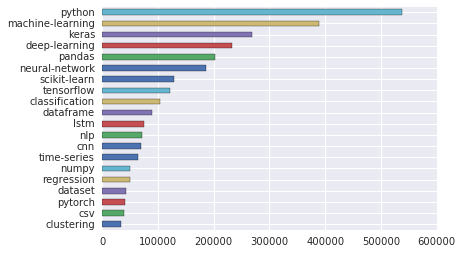

In [171]:
tag_viewed.head(20).sort_values(ascending=True).plot(kind = 'barh')

From the result above, the most used and viewed tags are:
    python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification, scikit-learn
    
Those are related to machine-learning. More specifically deep-learning. It seems like that's what people are most interested in 2019.Let's see if that's true for other time frame. 

## Just a Fad?

The following file has Id, CreationTime, and Tags from all time. We will see if the interest in deep learning is just one time was only 2019. 

In [173]:
all_questions = pd.read_csv('all_questions.csv', date_parser='CreationTime')

In [224]:
all_questions['CreationDate'] = pd.to_datetime(all_questions['CreationDate'])

In [174]:
all_questions['Tags'] = all_questions['Tags'].str.replace('><',',').str.replace('<','').str.replace('>','')
all_questions['Tags'] = all_questions['Tags'].str.split(',')

We are going to classify the question as deep-learning questiong when the question has at least one of the tags of  machine-learning, deep-learning, neural-network, keras, tensorflow.

In [218]:
def classfy_deeplearning(_list):
    deep_learning_tags = ['deep-learning', 'neural-network', 'keras', 'tensorflow']
    for tag in _list:
        if tag in deep_learning_tags:
            return 1
    return 0


In [228]:
all_questions['deeplearning'] = all_questions['Tags'].apply(classfy_deeplearning)

Id               int64
CreationDate    object
Tags            object
deeplearinng     int64
dtype: object

In [225]:
all_questions['year'] = all_questions['CreationDate'].dt.year

In [258]:
tags_by_year = all_questions.pivot_table(index = 'year', values = ['Id'], columns= 'deeplearning', aggfunc='count', margins = True)

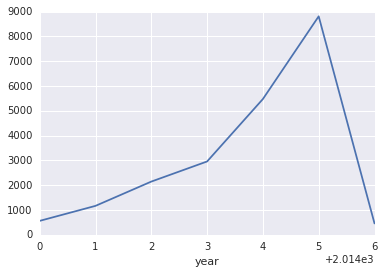

In [310]:
(tags_by_year['Id']['All']).drop('All').plot(kind='line')

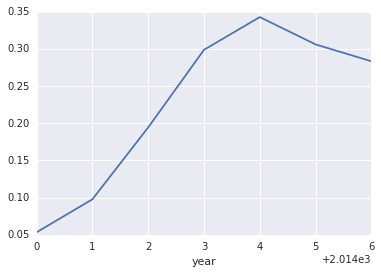

In [311]:
(tags_by_year['Id'][1] / tags_by_year['Id']['All']).drop('All').plot(kind='line')

In [280]:
?df.plot()

## Conclusion

From the exploring above, we found that deep learning is the most interested area in DSSE at the moment. researching 6 years worth of data (from 2014 to early 2020), we can conclude that it isn't just a fad. The ratio of this subject has been steadily growing for the past half decades. By focusing on those subjects aread, we 